# <span style="color:navy">IBM Capstone Project (On-Going Project)</span>

This project is being completed as Part of the IBM Data Science Professional Certification. 

# Stage 1
---

There are a total of 56 postal codes in Glasgow. In the first stage of this project, The postal codes for the possible venues are narrowed down based on four criteria. The criteria is as follows

Final Post codes must 
- be within 5 km of the city center
- have good transport accessibility (must be within 2 km of a subway station)
- have a high population
- have high population diversity 

In [65]:
# Defining the Search Paramenter variables
Distance_from_city_center = 5 #In Km
Distance_from_Subway_station = 2 #In Km

### 1.1 Scraping the Glasgow Postal Addresses from Wikipedia

In [66]:
#Importing the Libraries   
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [67]:
#Scraping data from web and saving into pandas dataframe
res = requests.get("https://en.wikipedia.org/wiki/G_postcode_area")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[1]
df = pd.read_html(str(table))
Glasgow_df=pd.DataFrame(df[0])
Glasgow_df.head()

,Postcode district,Post town,Coverage,Local authority area
0,G1,GLASGOW,Former C1 district: Merchant City,Glasgow City
1,G2,GLASGOW,"Former C2 district: Blythswood Hill, Anderston...",Glasgow City
2,G3,GLASGOW,"Former C3 district: Anderston, Finnieston, Gar...",Glasgow City
3,G4,GLASGOW,"Former C4 district: Calton (part), Cowcaddens ...",Glasgow City
4,G5,GLASGOW,Former C5 district: Gorbals,Glasgow City


In [68]:
#Printing the shape of the data frame before Preprocessing 
print(Glasgow_df.shape)

(56, 4)


There are a total of <span style="color:maroon">**56**</span> G postal codes.

###  1.2 Prepossing of the Data

In this step, the data in the dataframe is processed in order to remove invalid entries. This reduces the data frame to 51 entries.Information about the former districts is removed from the coverage column. A new column is also added to the dataframe. This column contains the first coverage entry. This new column is called 'District'. This column will later will be used to find the coordinates of the Postal code. 

In [69]:
# Droping the entries where the Local authority area is not defined
Glasgow_df=Glasgow_df[Glasgow_df['Local authority area'] != 'non-geographic']
Glasgow_df=Glasgow_df.reset_index(drop=True,inplace=False)
Glasgow_df.head()

,Postcode district,Post town,Coverage,Local authority area
0,G1,GLASGOW,Former C1 district: Merchant City,Glasgow City
1,G2,GLASGOW,"Former C2 district: Blythswood Hill, Anderston...",Glasgow City
2,G3,GLASGOW,"Former C3 district: Anderston, Finnieston, Gar...",Glasgow City
3,G4,GLASGOW,"Former C4 district: Calton (part), Cowcaddens ...",Glasgow City
4,G5,GLASGOW,Former C5 district: Gorbals,Glasgow City


In [70]:
#Printing the shape of the new data frame
print(Glasgow_df.shape)

(51, 4)


In [71]:
# Removing the former district information from the Coverage column 
for n in range (Glasgow_df.shape[0]):
    if ': ' in Glasgow_df['Coverage'][n]:
        t=Glasgow_df['Coverage'][n]
        Glasgow_df['Coverage'][n]=t.split(': ',2)[1]
Glasgow_df.head()

,Postcode district,Post town,Coverage,Local authority area
0,G1,GLASGOW,Merchant City,Glasgow City
1,G2,GLASGOW,"Blythswood Hill, Anderston (part)",Glasgow City
2,G3,GLASGOW,"Anderston, Finnieston, Garnethill, Park, Woodl...",Glasgow City
3,G4,GLASGOW,"Calton (part), Cowcaddens (part), Drygate, Kel...",Glasgow City
4,G5,GLASGOW,Gorbals,Glasgow City


In [72]:
# Forming a new Column called District which is the first area in the coverage column (This will be used to find the Latitude and Longitude Information)  
Glasgow_df['District']= Glasgow_df['Coverage'].str.rsplit(",", n =0 , expand = False).str[0] 
Glasgow_df['District']= Glasgow_df['District'].str.rsplit("(", n =0 , expand = False).str[0]
Glasgow_df['District'][47]='Hardgate'

In [73]:
#Printing the Entire Data Frame
Glasgow_df.head()

,Postcode district,Post town,Coverage,Local authority area,District
0,G1,GLASGOW,Merchant City,Glasgow City,Merchant City
1,G2,GLASGOW,"Blythswood Hill, Anderston (part)",Glasgow City,Blythswood Hill
2,G3,GLASGOW,"Anderston, Finnieston, Garnethill, Park, Woodl...",Glasgow City,Anderston
3,G4,GLASGOW,"Calton (part), Cowcaddens (part), Drygate, Kel...",Glasgow City,Calton
4,G5,GLASGOW,Gorbals,Glasgow City,Gorbals


### 1.3 Finding the Latitude and Longitude Information for all the G Postal codes

For the remaining valid postcode entries, Foursquare is used to find the coordinates (latitude and longitude) of each of the post codes. The following code is used. It uses the Nominatim library. The postal codes are found be feedind an address to the geolocator.geocode function. The input of the function is the Postal code and District Information from the Data Frame. All the Postal addressess are manually saved in a csv file named **Postcode_Glasgow_Longitude_Latitude_Data** in the Excel_Data Folder. This file is read and saved into a data frame that is then merged with the data frame scraped form the web.    

(The code):

    from geopy.geocoders import Nominatim
    for n in range (0,Glasgow_df.shape[0]):
        address = '{}, {}, Glasgow'.format(Glasgow_df['Postcode district'][n], Glasgow_df['District'][n])
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude=location.latitude
        longitude=location.longitude
        print('Index:',n,'{},{} has latitude='.format(Glasgow_df['Postcode district'][n], Glasgow_df['District'][n]),latitude,'and longitide=', longitude)

In [74]:
#The csv file is read and saved in a data frame
Glasgow_df_latlng = pd.read_csv('Excel_Data/Postcode_Glasgow_Longitude_Latitude_Data.csv', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [75]:
#The Data is processed to add index values 
Glasgow_df_latlng.columns = list(map(str, Glasgow_df_latlng.columns))
Glasgow_df_latlng.reset_index(level=0, inplace=True)
Glasgow_df_latlng.head()

,Postcode district,Latitude,Longitude
0,G1,55.859126,-4.246316
1,G2,55.863319,-4.261671
2,G3,55.859699,-4.271292
3,G4,55.853724,-4.232824
4,G5,55.851813,-4.253163


In [76]:
#The Glasgow_df and the Glasgow_df_latlng datasets are merged 
Glasgow = pd.merge(Glasgow_df, Glasgow_df_latlng, on='Postcode district')

In [77]:
#Displaying the entire dataset
Glasgow

,Postcode district,Post town,Coverage,Local authority area,District,Latitude,Longitude
0,G1,GLASGOW,Merchant City,Glasgow City,Merchant City,55.859126,-4.246316
1,G2,GLASGOW,"Blythswood Hill, Anderston (part)",Glasgow City,Blythswood Hill,55.863319,-4.261671
2,G3,GLASGOW,"Anderston, Finnieston, Garnethill, Park, Woodl...",Glasgow City,Anderston,55.859699,-4.271292
3,G4,GLASGOW,"Calton (part), Cowcaddens (part), Drygate, Kel...",Glasgow City,Calton,55.853724,-4.232824
4,G5,GLASGOW,Gorbals,Glasgow City,Gorbals,55.851813,-4.253163
5,G11,GLASGOW,"Broomhill, Partick, Partickhill",Glasgow City,Broomhill,55.877340,-4.321745
6,G12,GLASGOW,"West End (part), Cleveden, Dowanhill, Hillhead...",Glasgow City,West End,55.885411,-4.300418
7,G13,GLASGOW,"Anniesland, Knightswood, Yoker",Glasgow City,Anniesland,55.890019,-4.332739
8,G14,GLASGOW,"Whiteinch, Scotstoun",Glasgow City,Whiteinch,55.875338,-4.337189
9,G15,GLASGOW,Drumchapel,Glasgow City,Drumchapel,55.912244,-4.369171


### 1.4 Plotting the Postal Codes on a Map

All the 51 postal codes are pltted on a map to visualize their geographical distribution. The Folium library is used to plot the map.

In [78]:
# Importing the Libraries 
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim 
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium
from folium import IFrame
import numpy as np

Finding the Coordinates of Glasgow City to center the map:

    address = 'Glasgow, UK'
    geolocator = Nominatim(user_agent="t_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of Glasgow, UK are {}, {}.'.format(latitude, longitude))

In [79]:
#Coordinates of Glasgow City Center
latitude = 55.8609825
longitude = -4.2488787

In [80]:
# create map of Glasgow using latitude and longitude values to show all the Postal Codes
map_Glasgow = folium.Map(location=[latitude, longitude], zoom_start=9.5)
for lat, lng, post in zip(Glasgow['Latitude'], Glasgow['Longitude'], Glasgow['Postcode district']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Glasgow)  

text = 'City Center of Glasgow'
iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)
Text = folium.Marker(location=[55.8609825,-4.2488787], popup=popup)
map_Glasgow.add_child(Text)

map_Glasgow

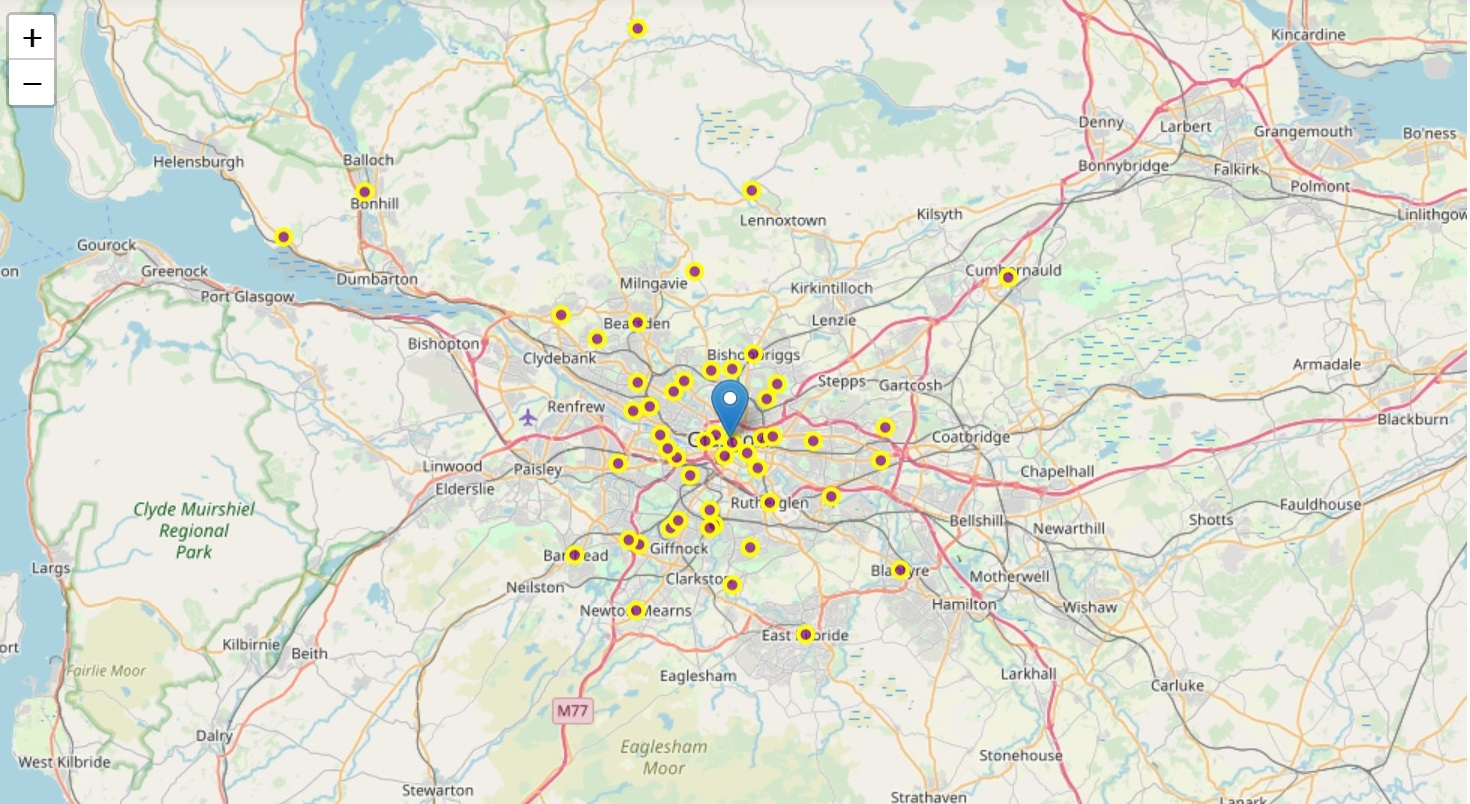

In [81]:
from IPython.display import Image
Image("Images/Glasgow_AllPostcodes.jpg")

As it can be seen from the Map Above, the Postal codes are spread over a very large area. Therefore in order to focus the analysis the postal codes near the City Center (within 5 km) are considered.

## <span style="color:maroon">1.5 Criteria 1</span>

### 1.5.1 Calculating the Distance of the Postal Codes from the city center

In order to find the post codes that are within 5 km of the city center, The Haversine formula is used to find the distance between two pair of latitude and longitude coordinates. For this a function is written called **calculate_distance_from_Glasgow_City_Center**. The distance for each postal code is found and saved into the data frame.

In [82]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance_from_Glasgow_City_Center(latitude,longitude):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(55.8609825) # Latitude Coordinates for the Glasgow City Center
    lon1 = radians(-4.2488787) # Longitude Coordinates for the Glasgow City Center
    lat2 = radians(latitude)
    lon2 = radians(longitude)
    #Haversine Formula to find distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance #The distance is returned in km

In [83]:
import numpy as np
distance=np.zeros((Glasgow_df.shape[0]))
for n in range (Glasgow_df.shape[0]):
    distance[n]=calculate_distance_from_Glasgow_City_Center(Glasgow['Latitude'][n],Glasgow['Longitude'][n])
Glasgow['Distance from Center']=distance

In [84]:
Glasgow.head()

,Postcode district,Post town,Coverage,Local authority area,District,Latitude,Longitude,Distance from Center
0,G1,GLASGOW,Merchant City,Glasgow City,Merchant City,55.859126,-4.246316,0.261226
1,G2,GLASGOW,"Blythswood Hill, Anderston (part)",Glasgow City,Blythswood Hill,55.863319,-4.261671,0.839709
2,G3,GLASGOW,"Anderston, Finnieston, Garnethill, Park, Woodl...",Glasgow City,Anderston,55.859699,-4.271292,1.406410
3,G4,GLASGOW,"Calton (part), Cowcaddens (part), Drygate, Kel...",Glasgow City,Calton,55.853724,-4.232824,1.287026
4,G5,GLASGOW,Gorbals,Glasgow City,Gorbals,55.851813,-4.253163,1.054402


### 1.5.2 Plotting the Postal codes that are within 5 km of the city center 

The folium library is used again to plot the postal codes within 5 km of the city center. 

In [85]:
#Color Mapping function
def colormapping(distance,req):
    threshold=req
    if distance<=threshold:
        return 'green'
    else:
        return 'red'

In [86]:
# create map centered around Glasgow
map_Glasgow = folium.Map(location=[latitude, longitude], zoom_start=9.5)
# Plotting the postal codes, if postal code is within 5 km of city center they are plotted as green circles, 
# if they are not with in 5 km then they are red circles  
for lat, lng, post, dist in zip(Glasgow['Latitude'], Glasgow['Longitude'], Glasgow['Postcode district'], Glasgow['Distance from Center']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colormapping(dist, Distance_from_city_center),
        fill=True,
        fill_color=colormapping(dist, Distance_from_city_center),
        fill_opacity=0.9,
        parse_html=False).add_to(map_Glasgow)  

text = 'City Center of Glasgow'
iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)
Text = folium.Marker(location=[55.8609825,-4.2488787], popup=popup)
map_Glasgow.add_child(Text)

folium.Circle(
    location=[55.8609825,-4.2488787],
    radius=Distance_from_city_center*1000,
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(map_Glasgow)

map_Glasgow

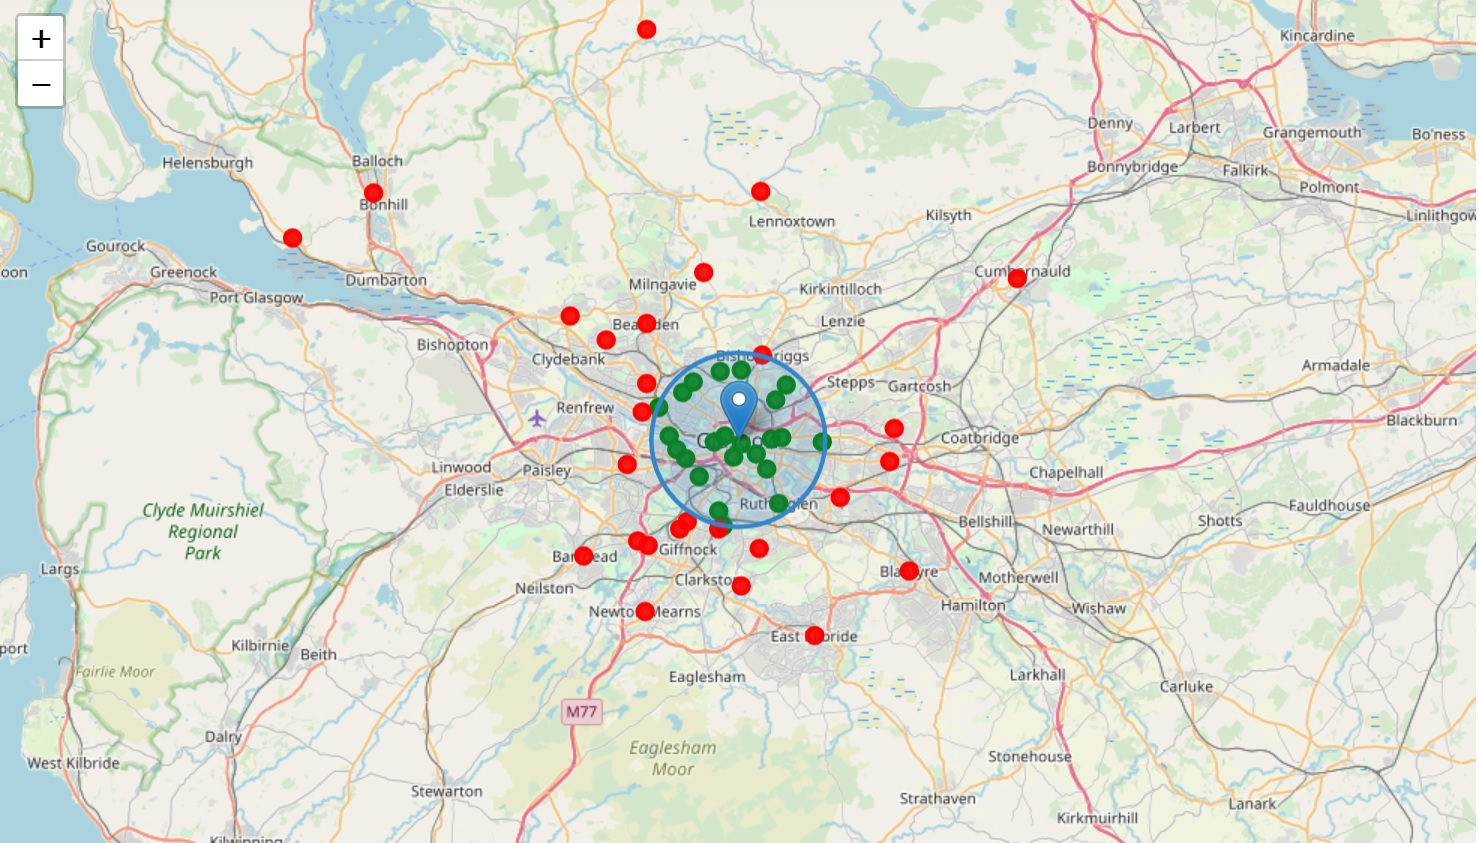

In [87]:
Image("Images/Glasgow_5km.jpg")

Post codes that satisfy the 5 km criteria are shown in green while those that don't satisfy the condition are plotted in red.

### 1.5.3 Performing second stage of data Preprossing to find postal codes with in 5 km of City Center

In [88]:
#Processing the the data set to remove the Postal codes that are more than the required distance away from the city center
Glasgow_dcc=Glasgow[Glasgow['Distance from Center'] <= Distance_from_city_center]
Glasgow_dcc.reset_index(drop=True,inplace = True) 
Glasgow_dcc.head()

,Postcode district,Post town,Coverage,Local authority area,District,Latitude,Longitude,Distance from Center
0,G1,GLASGOW,Merchant City,Glasgow City,Merchant City,55.859126,-4.246316,0.261226
1,G2,GLASGOW,"Blythswood Hill, Anderston (part)",Glasgow City,Blythswood Hill,55.863319,-4.261671,0.839709
2,G3,GLASGOW,"Anderston, Finnieston, Garnethill, Park, Woodl...",Glasgow City,Anderston,55.859699,-4.271292,1.406410
3,G4,GLASGOW,"Calton (part), Cowcaddens (part), Drygate, Kel...",Glasgow City,Calton,55.853724,-4.232824,1.287026
4,G5,GLASGOW,Gorbals,Glasgow City,Gorbals,55.851813,-4.253163,1.054402


In [89]:
Glasgow_dcc=Glasgow_dcc[Glasgow_dcc['Post town']=='GLASGOW']
print('There are',Glasgow_dcc.shape[0],'Postal codes that are within',Distance_from_city_center, 'km from the City Center') 

There are 23 Postal codes that are within 5 km from the City Center


## <span style="color:maroon">1.6 Criteria 2</span>

### 1.6.1 Finding the location of the Subway stations

The data set for the location of the the Subway stations are avaliable at this [link](https://data.glasgow.gov.uk/dataset/glasgow-subway-station-locations/resource/8c057567-55e7-4631-ae77-e37b4a0562e8) from the Glasgow City Council. The dataset is imported. The Nominatim library using foursquare_agent is used to find the coordinates of the Postal codes. These postal codes are manually added to an excel file titled **Subway_Latitude_Longitude** saved Excel_Data folder. This file is imported and merged with the dataset from the glasgow city council.

In [90]:
#The excel file is read and saved in a data frame
Glasgow_df_subway = pd.read_excel('Excel_Data/glasgow_subway_station_locations.xlsx', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [91]:
#The Data is processed to add index values 
Glasgow_df_subway.columns = list(map(str, Glasgow_df_subway.columns))
Glasgow_df_subway.reset_index(level=0, inplace=True)
#Glasgow_df_subway['Postcode'][9]='G51 1NW'
Glasgow_df_subway.head()

,Station Name,Address Line 1,Address Line 2,Address Line 3,Postcode,Easting,Northing,Accessible,Park and Ride,Wi-Fi,Bike Shelter,Special Car Sharing Parking Spaces,Lost Property Number,Nearby
0,Bridge Street,67,Eglinton Street,Glasgow,G5 9NR,258710,664400,Yes,Yes,Yes,Yes,No,0141 335 3276.,"Citizen’s Theatre, 02 Academy."
1,Buchanan Street,174,Buchanan Street,Glasgow,G1 2JZ,259073,665577,Yes,No,Yes,No,No,0141 335 3276.,"Queen’s Street Station, Buchanan Bus Station, ..."
2,Cessnock,1,Cessnock Street,Glasgow,G51 1AS,256470,664490,Yes,No,Yes,No,No,0141 335 3276.,"Glasgow Science Centre, IMAX, SECC"
3,Cowcaddens,11,"Dundasvale Court, Unit 1",Glasgow,G4 0SN,258679,666191,Yes,No,Yes,No,No,0141 335 3276.,"Glasgow School of Art, GFT, Tenement House."
4,Govan,737,Govan Road,Glasgow,G51 2YJ,255490,665643,Yes,No,Yes,No,No,0141 335 3276.,"Southern General Hospital, Govan Old Parish Ch..."


The following code is used to find the latitude and Longitude of the 15 subway stations:

    from geopy.geocoders import Nominatim
    for n in range (0, Glasgow_df_subway.shape[0]):
        address = '{} {}, {}, Glasgow'.format(Glasgow_df_subway['Address Line 1'][n],Glasgow_df_subway['Address Line 2'][n], Glasgow_df_subway['Postcode'][n])
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude=location.latitude
        longitude=location.longitude
        print('Index:',n,'{},{} has latitude='.format(Glasgow_df_subway['Station Name'][n], Glasgow_df_subway['Postcode'][n]),latitude,'and longitide=', longitude)

In [92]:
#The excel file is read and saved in a data frame
Glasgow_df_subway_latlog = pd.read_excel('Excel_Data/Subway_Latitude_Longitude.xlsx', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [93]:
Glasgow_df_subway_latlog.columns = list(map(str, Glasgow_df_subway_latlog.columns))
Glasgow_df_subway_latlog.reset_index(level=0, inplace=True)
Glasgow_df_subway_latlog.head()

,Station Name,Latitude,Longitude
0,Bridge Street,55.851452,-4.259382
1,Buchanan Street,55.861888,-4.253626
2,Cessnock,55.852726,-4.294110
3,Cowcaddens,55.868063,-4.259899
4,Govan,55.861783,-4.308399


In [94]:
Glasgow_subway = pd.merge(Glasgow_df_subway, Glasgow_df_subway_latlog, on='Station Name')

### 1.6.2 Plotting the Map of the Glasgow Subway 

The folium library is used to plot the positions of the Subway stations in Glasgow.

In [95]:
map_Glasgow_Subway = folium.Map(location=[latitude, longitude],tiles='Stamen Toner', zoom_start=12)
for lat, lng, sname in zip(Glasgow_subway['Latitude'], Glasgow_subway['Longitude'], Glasgow_subway['Station Name']):
    label = 'Station Name: {}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
    location=[lat, lng],
    radius=Distance_from_Subway_station*1000,
    color='#3186cc',
    stroke= False,
    weight=1,
    fill=True,
    fill_opacity=0.1,
    fill_color='#3186cc'
    ).add_to(map_Glasgow_Subway)
for lat, lng, sname in zip(Glasgow_subway['Latitude'], Glasgow_subway['Longitude'], Glasgow_subway['Station Name']):
    label = 'Station Name: {}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    icon_url='https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Glasgow_Subway.svg/800px-Glasgow_Subway.svg.png'
    icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))
    folium.Marker(
    location=[lat, lng],
    icon=icon,
    popup=label
    ).add_to(map_Glasgow_Subway)

    
map_Glasgow_Subway

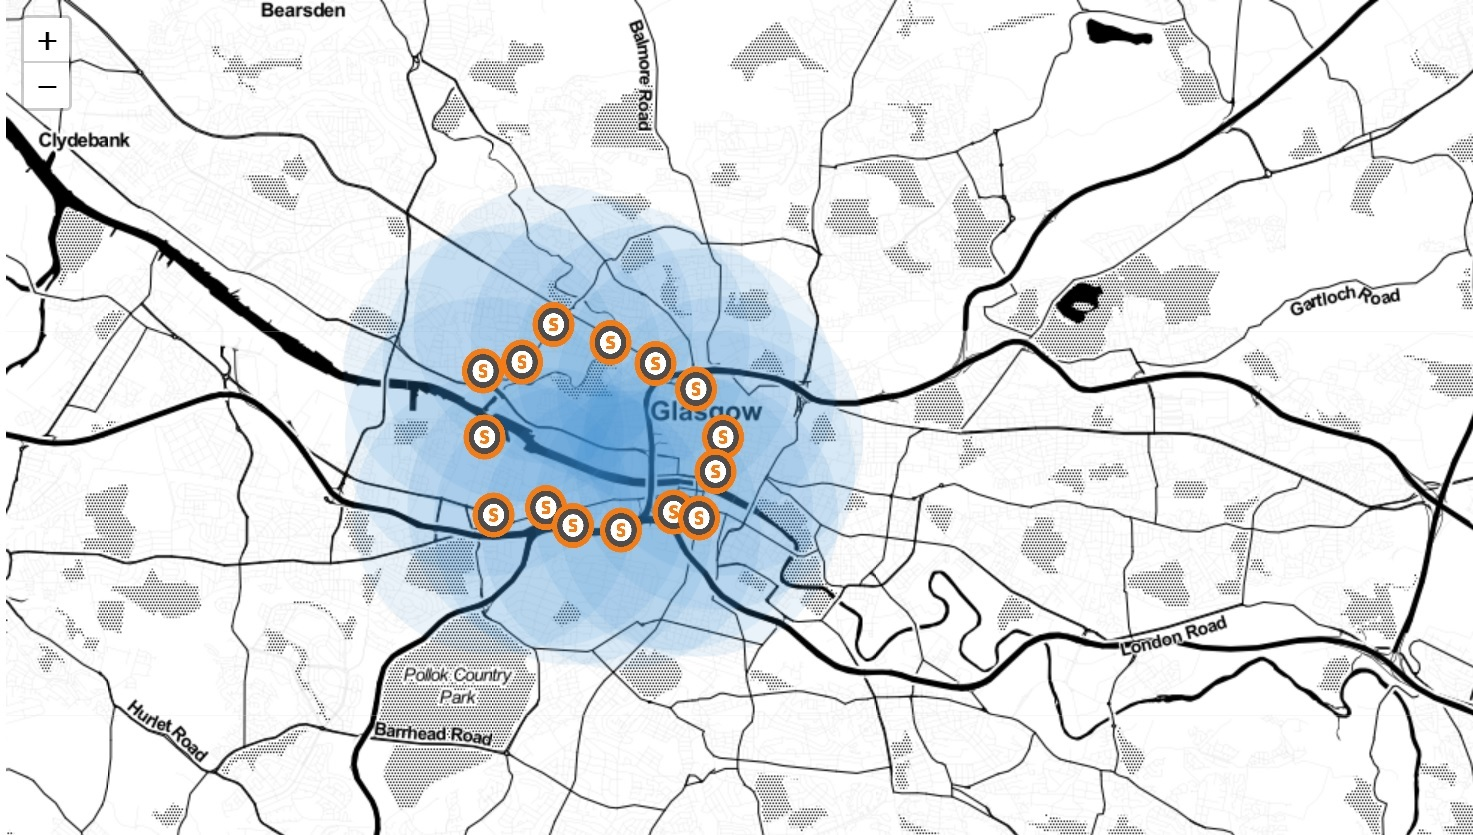

In [96]:
Image("Images/Glasgow_Subway.jpg")

### 1.6.3 Finding the Nearest Subway station and the distance between the postal code and that Subway station

For the 23 Postal codes that are within 5km of the city center, the distance from the nearest subway station is found. For this a function is written that uses the the Haversine Formula to find distance. It returns the name of the nearest subway station and distance to the nearest subway station. Both these paramenters are added to that data frame.  

In [97]:
# Function that returns the distance of the closest subway station and the name of that station
def calculate_distance_from_Subway_station(latitude,longitude):
    Station_names=['Bridge Street', 
                   'Buchanan Street', 
                   'Cessnock', 
                   'Cowcaddens', 
                   'Govan', 
                   'Hillhead', 
                   'Ibrox', 
                   'Kelvinhall', 
                   'Kelvinbridge', 
                   'Kinning Park',
                   'Partick', 
                   'Sheilds Road', 
                   'St. Enoch', 
                   'St Georges Cross', 
                   'West Street']
    distancesarray=np.zeros((len(Station_names)))
    for n in range (len(Station_names)):
        # approximate radius of earth in km
        R = 6373.0
        lat1 = radians(Glasgow_subway['Latitude'][n]) # Latitude Coordinates for the Glasgow City Center
        lon1 = radians(Glasgow_subway['Longitude'][n]) # Longitude Coordinates for the Glasgow City Center
        lat2 = radians(latitude)
        lon2 = radians(longitude)
        #Haversine Formula to find distance
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distancesarray[n] = R * c
        
    min_distance=min(distancesarray)
    index_min=np.argmin(distancesarray)
    station=Station_names[index_min]
    
    return min_distance, station #The distance is returned in km

In [98]:
# Calling the calculate_distance_from_Subway_station function on the postal codes that are within 5 km of 
nearest_station=[]
distancesfromsubway=np.zeros((Glasgow_dcc.shape[0]))
for n in range (Glasgow_dcc.shape[0]):
    lat1=Glasgow_dcc['Latitude'][n]
    long1=Glasgow_dcc['Longitude'][n]
    dist, stat = calculate_distance_from_Subway_station(lat1,long1)
    distancesfromsubway[n]=dist
    nearest_station.append(stat)

In [99]:
Glasgow_dcc['Distance from Nearest Subway']=distancesfromsubway
Glasgow_dcc['Nearest Subway']=nearest_station

In [100]:
Glasgow_dcc.head()

,Postcode district,Post town,Coverage,Local authority area,District,Latitude,Longitude,Distance from Center,Distance from Nearest Subway,Nearest Subway
0,G1,GLASGOW,Merchant City,Glasgow City,Merchant City,55.859126,-4.246316,0.261226,0.550108,Buchanan Street
1,G2,GLASGOW,"Blythswood Hill, Anderston (part)",Glasgow City,Blythswood Hill,55.863319,-4.261671,0.839709,0.526778,Buchanan Street
2,G3,GLASGOW,"Anderston, Finnieston, Garnethill, Park, Woodl...",Glasgow City,Anderston,55.859699,-4.271292,1.406410,0.912032,West Street
3,G4,GLASGOW,"Calton (part), Cowcaddens (part), Drygate, Kel...",Glasgow City,Calton,55.853724,-4.232824,1.287026,1.474669,St. Enoch
4,G5,GLASGOW,Gorbals,Glasgow City,Gorbals,55.851813,-4.253163,1.054402,0.390402,Bridge Street


### 1.6.4 Plotting the Postal codes that are with in 2 km of Subway station and 5 km for the city center

Folium library is used to plot the Map. The postal codes that are within 2 km of subway station and 5 km from city center are plotted in green.  

In [101]:
# create map centered around Glasgow
map_Glasgow_Subway_5k = folium.Map(location=[latitude, longitude], zoom_start=11.5)
# Plotting the postal codes, if postal code is within 5 km of city center they are plotted as green circles, 
# if they are not with in 5 km then they are red circles

text = 'City Center of Glasgow'
iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)
Text = folium.Marker(location=[55.8609825,-4.2488787], popup=popup)
map_Glasgow_Subway_5k.add_child(Text)

folium.Circle(
    location=[55.8609825,-4.2488787],
    radius=Distance_from_city_center*1000,
    color='#3186cc',
    fill=True,
    stroke= False,
    fill_color='#3186cc',
    fill_opacity=0.4
).add_to(map_Glasgow_Subway_5k)

for lat, lng, sname in zip(Glasgow_subway['Latitude'], Glasgow_subway['Longitude'], Glasgow_subway['Station Name']):
    label = 'Station Name: {}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
    location=[lat, lng],
    radius=Distance_from_Subway_station*1000,
    color='#3186cc',
    stroke= False,
    weight=1,
    fill=True,
    fill_opacity=0.1,
    fill_color='orange'
    ).add_to(map_Glasgow_Subway_5k)
for lat, lng, sname in zip(Glasgow_subway['Latitude'], Glasgow_subway['Longitude'], Glasgow_subway['Station Name']):
    label = 'Station Name: {}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    icon_url='https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Glasgow_Subway.svg/800px-Glasgow_Subway.svg.png'
    icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))
    folium.Marker(
    location=[lat, lng],
    icon=icon,
    popup=label
    ).add_to(map_Glasgow_Subway_5k)
    
for lat, lng, post, dist in zip(Glasgow_dcc['Latitude'], Glasgow_dcc['Longitude'], Glasgow_dcc['Postcode district'], Glasgow_dcc['Distance from Nearest Subway']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colormapping(dist, Distance_from_Subway_station),
        fill=True,
        fill_color=colormapping(dist, Distance_from_Subway_station),
        fill_opacity=0.9,
        parse_html=False).add_to(map_Glasgow_Subway_5k)  

    
map_Glasgow_Subway_5k

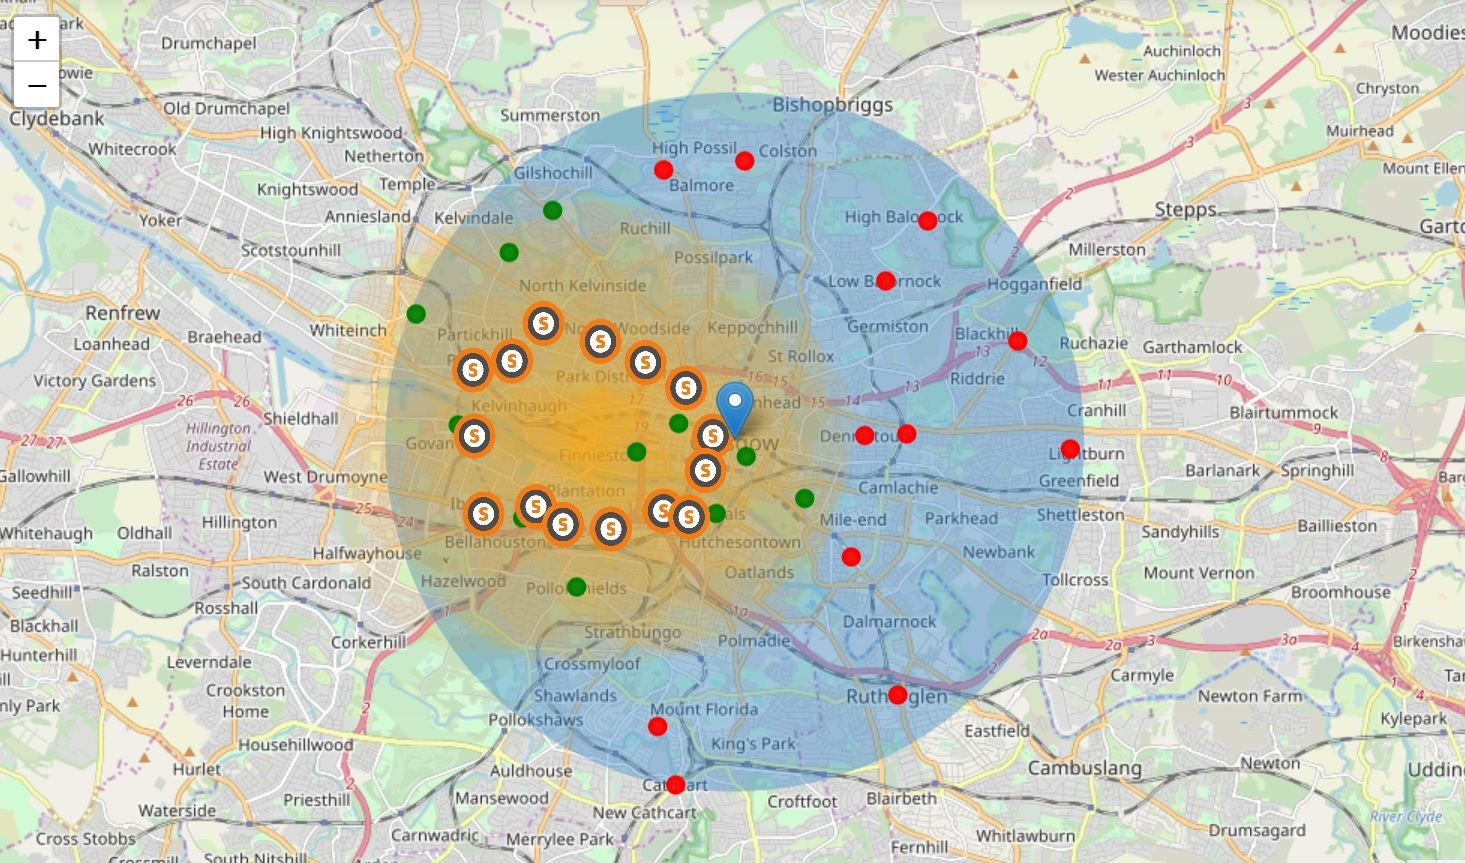

In [102]:
Image("Images/Glasgow_Subway_5k.jpg")

### 1.6.5 Processing the data frame to identity the postal codes that satisfy criteria 1 and 2

In [103]:
#Processing the the data set to remove the Postal codes that are more than the required distance away from the Subway Stations 
Glasgow_dss=Glasgow_dcc[Glasgow_dcc['Distance from Nearest Subway'] <= Distance_from_Subway_station]
Glasgow_dss.reset_index(drop=True,inplace = True) 
Glasgow_dss.head()

,Postcode district,Post town,Coverage,Local authority area,District,Latitude,Longitude,Distance from Center,Distance from Nearest Subway,Nearest Subway
0,G1,GLASGOW,Merchant City,Glasgow City,Merchant City,55.859126,-4.246316,0.261226,0.550108,Buchanan Street
1,G2,GLASGOW,"Blythswood Hill, Anderston (part)",Glasgow City,Blythswood Hill,55.863319,-4.261671,0.839709,0.526778,Buchanan Street
2,G3,GLASGOW,"Anderston, Finnieston, Garnethill, Park, Woodl...",Glasgow City,Anderston,55.859699,-4.271292,1.406410,0.912032,West Street
3,G4,GLASGOW,"Calton (part), Cowcaddens (part), Drygate, Kel...",Glasgow City,Calton,55.853724,-4.232824,1.287026,1.474669,St. Enoch
4,G5,GLASGOW,Gorbals,Glasgow City,Gorbals,55.851813,-4.253163,1.054402,0.390402,Bridge Street


In [104]:
print('There are',Glasgow_dss.shape[0],'Postal codes that are within',Distance_from_city_center, 'km from the City Center and that are within', Distance_from_Subway_station,'km from the subway stations') 

There are 11 Postal codes that are within 5 km from the City Center and that are within 2 km from the subway stations


## <span style="color:maroon">1.7 Criteria 3 and 4</span>

To analyze the Population and the Population Diversity of each Postal Code two data set are used.

1) [Royal Mail Data set:](http://www.glasgow.gov.uk/CHttpHandler.ashx?id=16002&p=0) This data set contains all the postal codes in Glasgow. It has almost 15,000 data entries. Along with the Postal codes it also has the corresponding Datazone

2) [Glasgow City Council Data Set:](https://data.glasgow.gov.uk/dataset/national-identity-by-ethnic-group-2011-census) This data set contains the Datazone entries along with the national Identity of the population in that Data Zone. The data set has almost 6200 entries.

Both these data sets are imported and processed to extract the population at each postcode. The ethnicity of the population is also extracted. 

### 1.7.1 Data Preprocessing of the Glasgow City council Data Set

The Glasgow City Council data set is imported and processed.

In [105]:
Glasgow_ethnicity = pd.read_excel('Excel_Data/nationalidentitybyethnicgroup_2.xlsx', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [106]:
Glasgow_ethnicity.columns = list(map(str, Glasgow_ethnicity.columns))
Glasgow_ethnicity.reset_index(level=0, inplace=True)
Glasgow_ethnicity.head()

,Data Zone,Intermediate Geography Name,Sub group,All people,White: Total,White: Scottish,White: Other British,White: Irish,White: Other (1),Mixed or multiple ethnic groups,Asian Asian Scottish or Asian British,African,Caribbean or Black,Other ethnic groups
0,S01003025,Carmunnock South,All people,857,833,741,50,20,22,1,20,0,1,2
1,S01003025,Carmunnock South,Scottish identity only,517,508,482,7,12,7,1,8,0,0,0
2,S01003025,Carmunnock South,British identity only,89,80,57,20,1,2,0,9,0,0,0
3,S01003025,Carmunnock South,Scottish and British identities only,193,191,189,0,1,1,0,2,0,0,0
4,S01003025,Carmunnock South,Scottish and any other identities,15,14,8,4,0,2,0,1,0,0,0


In [107]:
Glasgow_ethnicity.shape

(6210, 14)

In [108]:
Glasgow_ethnicity_df=Glasgow_ethnicity[Glasgow_ethnicity['Sub group'] == 'All people']
Glasgow_ethnicity_df.reset_index(drop=True,inplace = True) 

In [109]:
Glasgow_ethnicity_df=Glasgow_ethnicity_df[['Data Zone', 'All people', 'White: Total', 'Asian Asian Scottish or Asian British', 'African']]

In [110]:
Glasgow_ethnicity_df.shape

(690, 5)

### 1.7.2 Preprocessin the Royal Mail Data Set

In [111]:
Glasgow_Royalmail = pd.read_excel('Excel_Data/RoyalMailPostalCodes.xlsx', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [112]:
Glasgow_Royalmail.columns = list(map(str, Glasgow_Royalmail.columns))
Glasgow_Royalmail.reset_index(level=0, inplace=True)
Glasgow_Royalmail.head()

,Postcode unit,Type of Postcode,Sector Community Planning Partnership,Multi member Ward / Local Area Partnership,Data Zone,Data Zone Rank (SIMD 2012),Is this in a bottom 15% Data Zone?
0,G1 1BL,small user,North West,Anderston/City,S01003366,4833,no
1,G1 1BQ,small user,North West,Anderston/City,S01003358,1847,no
2,G1 1BX,Large User,North West,Anderston/City,S01003399,4029,no
3,G1 1DA,small user,North West,Anderston/City,S01003358,1847,no
4,G1 1DG,small user,North West,Anderston/City,S01003358,1847,no


Creating a variable that is used to store the postal codes that were shortlisted in the Previous Data Analysis

In [113]:
strings=['G1 ', 'G2 ', 'G3 ', 'G4 ', 'G5 ', 'G11 ', 'G12 ', 'G20 ', 'G41 ', 'G51 2', 'G51 1']

Declaring the Data frame that will be used to store the Data for population in the postal codes

In [114]:
summary = pd.DataFrame(columns=['Data Zone','All people','White: Total','Asian Asian Scottish or Asian British','African','Post Code'])

In [115]:
for b in range (len(strings)):
    mask = np.column_stack([Glasgow_Royalmail['Postcode unit'].str.contains(strings[b], na=False) for col in Glasgow_Royalmail])
    G=Glasgow_Royalmail.loc[mask.any(axis=1)]
    Data_zones=G['Data Zone'].unique()
    for n in range (len(Data_zones)):
        u1=Glasgow_ethnicity_df[Glasgow_ethnicity_df['Data Zone'] == Data_zones[n]]
        u1['Post Code']=strings[b]
        summary=summary.append(u1, ignore_index = True)

C:\Users\rabiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [116]:
summary.shape

(234, 6)

In [117]:
summary2 = pd.DataFrame(columns=['All people','White','White Percentage','Asian','Asian Percentage','African','African Percentage','Post Code'])

In [118]:
for n in range (len(strings)):
    new=summary[summary['Post Code']== strings[n]]
    population=new.sum()[1]
    White=new.sum()[2]
    White_percent=(White/population)*100
    Asian=new.sum()[3]
    Asian_percent=(Asian/population)*100
    African=new.sum()[4]
    African_percent=(African/population)*100
    toadd = pd.DataFrame({"All people":[population], 
                    "White":[White],
                    'White Percentage':[White_percent],
                    'Asian':[Asian],
                    'Asian Percentage':[Asian_percent],
                    'African':[African],
                    'African Percentage':[African_percent],
                    'Post Code':[strings[n]]
                   }) 
    summary2=summary2.append(toadd, ignore_index = True)

In [119]:
summary2.sort_values(['All people'], ascending=False, axis=0, inplace=True)
summary2.reset_index(drop=True,inplace = True) 

In [120]:
summary2

,All people,White,White Percentage,Asian,Asian Percentage,African,African Percentage,Post Code
0,36994,26830,72.525274,8792,23.766016,639,1.727307,G41
1,36269,31681,87.350079,2866,7.902065,1028,2.834376,G20
2,31367,27572,87.901298,2814,8.971212,249,0.793828,G12
3,26862,20312,75.616112,5083,18.922642,478,1.779465,G3
4,24474,18245,74.548500,4353,17.786222,1008,4.118657,G4
5,23157,20916,90.322581,1598,6.900721,169,0.729801,G11
6,13291,10450,78.624633,2084,15.679783,306,2.302310,G1
7,11781,9669,82.072829,1283,10.890417,611,5.186317,G5
8,9736,7578,77.834840,1565,16.074363,218,2.239113,G2
9,8862,6581,74.260889,1884,21.259309,204,2.301963,G51 1


The 11 Postal codes that have been shortlisted so far are listed in the data frame above. In order to shortlist these postal codes further on the bases of population, the total population and ethnicity data is plotted for better visualization. The aim is to select three final postcodes to search for potential venues using the FoursquareAPI. Postal code with a larger population are prefered. **But selection priority is given to postal codes having higher diversity of population over total population.**

### 1.7.3 Plotting the Total population at each postal code

In [121]:
# Importing libraries for plotting
from PIL import Image # converting images into arrays
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In the first plot, The total population is plotted. The postal codes are arranged in desending order of population. The postal codes having the six largest populations are G41, G20, G12, G3, G4 and G11 (arranged according to population)

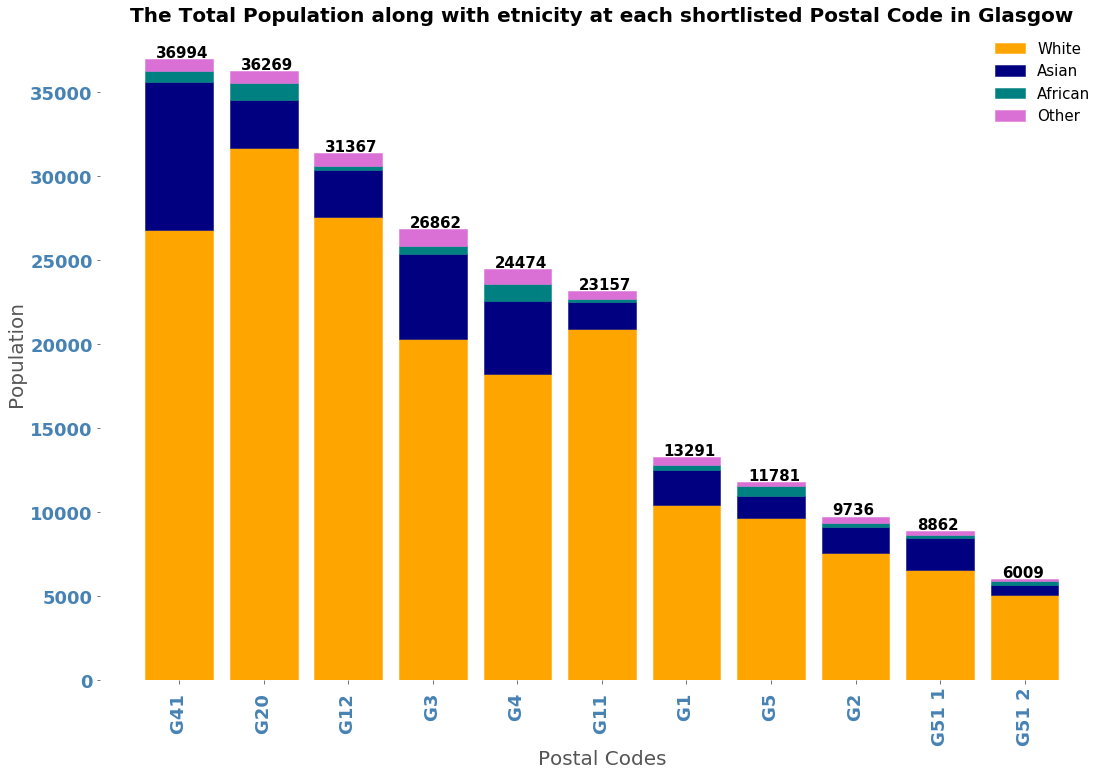

In [122]:
f, ax = plt.subplots(figsize=(18, 12))
plt.xticks(fontsize=18, rotation=90, color='steelblue', fontweight='bold')
plt.yticks(fontsize=18, rotation=0, color='steelblue', fontweight='bold')
ax.set_facecolor("white")

#sns.barplot(x="Post Code", y='All people', data=summary2, color="m")
plt.bar(summary2['Post Code'], summary2['White'], color='orange', edgecolor='orange', label="White")
plt.bar(summary2['Post Code'], summary2['Asian'], bottom=summary2['White'], color='navy', edgecolor='navy', label="Asian")
plt.bar(summary2['Post Code'], summary2['African'], bottom=summary2['White']+summary2['Asian'], color='teal', edgecolor='teal', label='African')
plt.bar(summary2['Post Code'], (summary2['All people']-(summary2['White']+summary2['Asian']+summary2['African'])), bottom=summary2['White']+summary2['Asian']+summary2['African'], color='orchid', edgecolor='orchid', label='Other')

ax.set_xlabel('Postal Codes', fontsize=20)
ax.set_ylabel("Population", fontsize=20)
ax.set_title('The Total Population along with etnicity at each shortlisted Postal Code in Glasgow', fontsize=20, fontweight='bold')
ax.legend(loc="upper right", frameon=False, fontsize=15, facecolor="white")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i, label in enumerate(list(summary2['All people'].index)):
    score = summary2.loc[label]['All people']
    ax.annotate((str(round(score,2))), (i-0.27, score+100), size=15, color='k', weight='bold')

In order to further analyse the top 6 post codes <span style="color:red">**(G41, G20, G12, G3, G4 and G11)**</span>, The percentage of the top three ethnicities in the postal districts are plotted.  

### 1.7.4 Plotting the percentage of the top three ethnicities

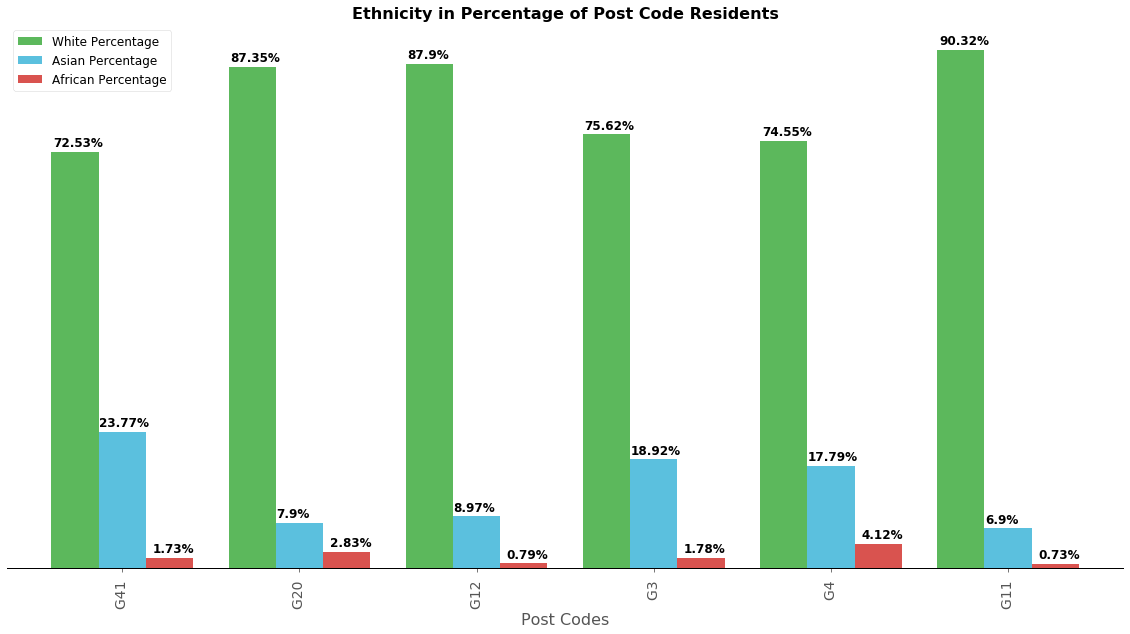

In [123]:
subset=summary2[['Post Code','White Percentage', 'Asian Percentage','African Percentage']]
subset=subset[0:6]
subset=subset.set_index('Post Code')

mpl.rc('axes',edgecolor='black')
ax=subset.plot(kind='bar', figsize=(20, 10), color=['#5cb85c', '#5bc0de', '#d9534f'], width=0.8, fontsize=14)
ax.spines["right"].set_visible(False)

ax.set_title('Ethnicity in Percentage of Post Code Residents', fontsize=16, loc='center', fontweight='bold')
ax.set_xlabel('Post Codes', fontsize=16)

ax.legend(fontsize=12, shadow=False, facecolor="white", loc='upper left', ncol=1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.axes.get_yaxis().set_ticks([])
ax.set_facecolor("white")

for i, label in enumerate(list(subset['White Percentage'].index)):
    score = subset.loc[label]['White Percentage']
    ax.annotate((str(round(score,2))+str('%')), (i-0.39, score+1), size=12, rotation=0, fontweight='bold')

for i, label in enumerate(list(subset['Asian Percentage'].index)):
    score = subset.loc[label]['Asian Percentage']
    ax.annotate((str(round(score,2))+str('%')), (i-0.13, score+1),size=12, rotation=0, fontweight='bold')
    
for i, label in enumerate(list(subset['African Percentage'].index)):
    score = subset.loc[label]['African Percentage']
    ax.annotate((str(round(score,2))+str('%')), (i+0.17, score+1), size=12, rotation=0, fontweight='bold')

The postal codes can be clustered into 2 sub groups. Sub-group 1 has G41, G3 and G4 as its members while sub-group 2 has G20, G12 and G11 as its members. The diversity of Sub-group 1 is higher than the diversity of Sub-group 2. In order to visualize this better, donut plots are plotted below.

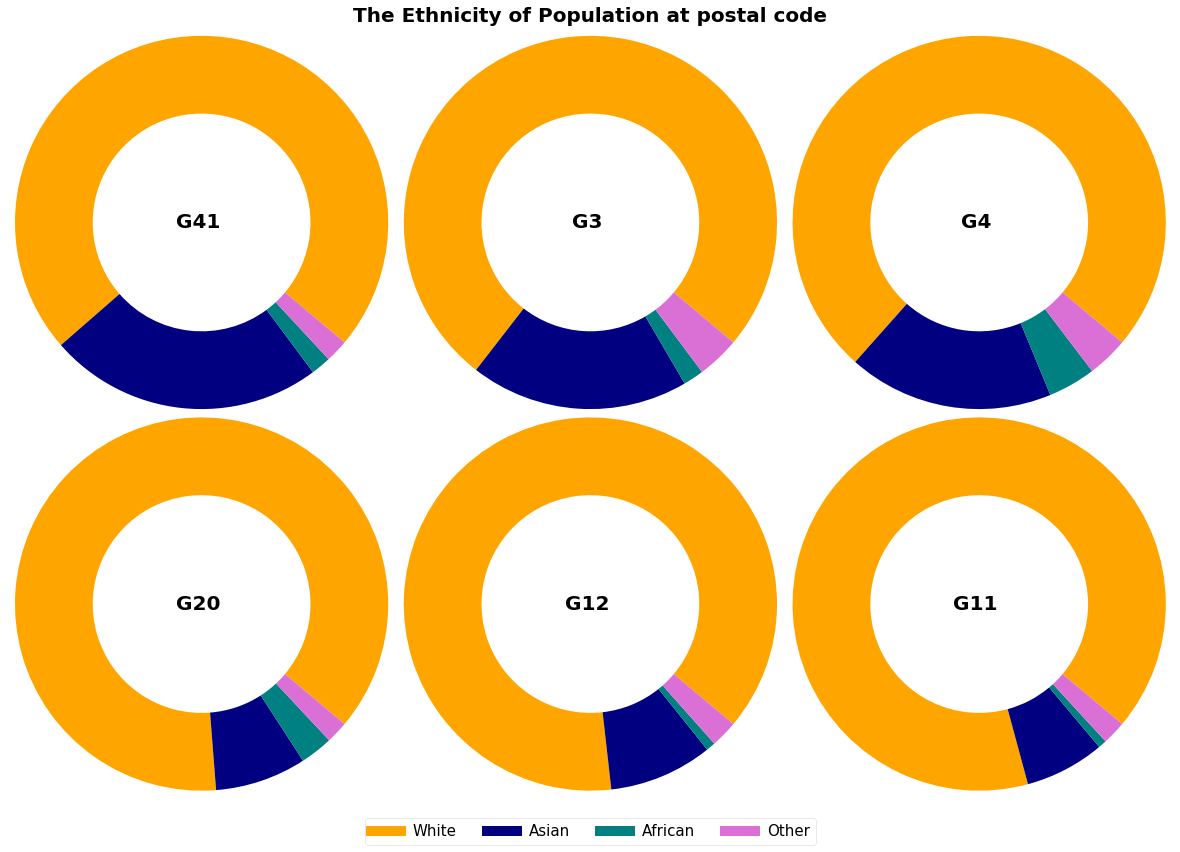

In [124]:
cols = ['orange', 'navy', 'teal', 'orchid']

fig = plt.figure(figsize=(18, 20))
labels = ['White', 'Asian', 'African', 'Other']

data1 = [summary2['White'][1], summary2['Asian'][1], summary2['African'][1], (summary2['All people'][1]-(summary2['White'][1]+summary2['Asian'][1]+summary2['African'][1]))]
ax = fig.add_axes([0, .035, .3, .3], aspect=1)
ax.pie(data1, wedgeprops=dict(width=0.5), radius = 1.2, startangle=-40, colors=cols)
kwargs = dict(size=20, fontweight='bold', va='center')
ax.text(0, 0, summary2['Post Code'][1], ha='center', **kwargs)

data2 = [summary2['White'][2], summary2['Asian'][2], summary2['African'][2], (summary2['All people'][2]-(summary2['White'][2]+summary2['Asian'][2]+summary2['African'][2]))]
ax = fig.add_axes([.3, .035, .3, .3], aspect=1)
ax.pie(data2, wedgeprops=dict(width=0.5), radius = 1.2, startangle=-40, colors=cols)
kwargs = dict(size=20, fontweight='bold', va='center')
ax.text(0, 0, summary2['Post Code'][2], ha='center', **kwargs)

data3 = [summary2['White'][5], summary2['Asian'][5], summary2['African'][5], (summary2['All people'][5]-(summary2['White'][5]+summary2['Asian'][5]+summary2['African'][5]))]
ax = fig.add_axes([.6, .035, .3, .3], aspect=1)
ax.pie(data3, wedgeprops=dict(width=0.5), radius = 1.2, startangle=-40, colors=cols)
kwargs = dict(size=20, fontweight='bold', va='center')
ax.text(0, 0, summary2['Post Code'][5], ha='center', **kwargs)

data4 = [summary2['White'][0], summary2['Asian'][0], summary2['African'][0], (summary2['All people'][0]-(summary2['White'][0]+summary2['Asian'][0]+summary2['African'][0]))]
ax = fig.add_axes([.0, .3, .3, .3], aspect=1)
ax.pie(data4, wedgeprops=dict(width=0.5), radius = 1.2, startangle=-40, colors=cols)
kwargs = dict(size=20, fontweight='bold', va='center')
ax.text(0, 0, summary2['Post Code'][0], ha='center', **kwargs)

data5 = [summary2['White'][3], summary2['Asian'][3], summary2['African'][3], (summary2['All people'][3]-(summary2['White'][3]+summary2['Asian'][3]+summary2['African'][3]))]
ax = fig.add_axes([.3, .3, .3, .3], aspect=1)
ax.pie(data5, wedgeprops=dict(width=0.5), radius = 1.2, startangle=-40, colors=cols)
kwargs = dict(size=20, fontweight='bold', va='center')
ax.text(0, 0, summary2['Post Code'][3], ha='center', **kwargs)
ax.set_title('The Ethnicity of Population at postal code',fontweight='bold', fontsize=20)

data5 = [summary2['White'][4], summary2['Asian'][4], summary2['African'][4], (summary2['All people'][4]-(summary2['White'][4]+summary2['Asian'][4]+summary2['African'][4]))]
ax = fig.add_axes([.6, .3, .3, .3], aspect=1)
ax.pie(data5, wedgeprops=dict(width=0.5), radius = 1.2, startangle=-40, colors=cols)
kwargs = dict(size=20, fontweight='bold', va='center')
ax.text(0, 0, summary2['Post Code'][4], ha='center', **kwargs)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=10),
                Line2D([0], [0], color='navy', lw=10),
                Line2D([0], [0], color='teal', lw=10),
                Line2D([0], [0], color='orchid', lw=10)]

ax.legend(custom_lines, ['White', 'Asian', 'African', 'Other'], ncol=4, facecolor="white", loc='lower center', bbox_to_anchor=(-0.75, -1.12, 0.5, 0.5), fontsize=15)
plt.show()

The sub-group 1 are shown in the top row while sub-group 2 are shown in row 2. The proximity of the postal codes with in the sub-groups explains the similarity in the population profile. This can be better visualized on a Map below. G41, G3 and G4 are geographical closer together and therefore have similar population profiles. While G20, G12, G11 are geographical closer together as shown below.

In [125]:
#Preprocessing the Data to draw map
Glasgow_dss=Glasgow_dss.rename(columns={"Postcode district": "Post Code"})
subset=summary2[0:6]
subset.columns = list(map(str, subset.columns))
strings2=['G41', 'G20', 'G12', 'G3', 'G4', 'G11']
subset['Post Code']=strings2
Top6= pd.merge(Glasgow_dss, subset, on='Post Code')
set1=['G41', 'G3', 'G4']
set2=['G20', 'G12', 'G11']
Subset1=Top6.loc[Top6['Post Code'].isin(set1)]
Subset2=Top6.loc[Top6['Post Code'].isin(set2)]

C:\Users\rabiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
# create map centered around Glasgow
map_Glasgow_Subway_5k_Top6 = folium.Map(location=[latitude, longitude], zoom_start=11.5)
# Plotting the postal codes, if postal code is within 5 km of city center they are plotted as green circles, 
# if they are not with in 5 km then they are red circles


folium.Circle(
    location=[55.8507965,-4.2564398],
    radius=2400,
    color='tomato',
    fill=True,
    stroke= False,
    fill_color='tomato',
    fill_opacity=0.2
).add_to(map_Glasgow_Subway_5k_Top6)

folium.Circle(
    location=[55.8854112,-4.3004182],
    radius=2000,
    color='magenta',
    fill=True,
    stroke= False,
    fill_color='magenta',
    fill_opacity=0.2
).add_to(map_Glasgow_Subway_5k_Top6)


for lat, lng, post in zip(Subset1['Latitude'], Subset1['Longitude'], Subset1['Post Code']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.9,
        parse_html=False).add_to(map_Glasgow_Subway_5k_Top6)  

for lat, lng, post in zip(Subset2['Latitude'], Subset2['Longitude'], Subset2['Post Code']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.9,
        parse_html=False).add_to(map_Glasgow_Subway_5k_Top6) 
    
map_Glasgow_Subway_5k_Top6

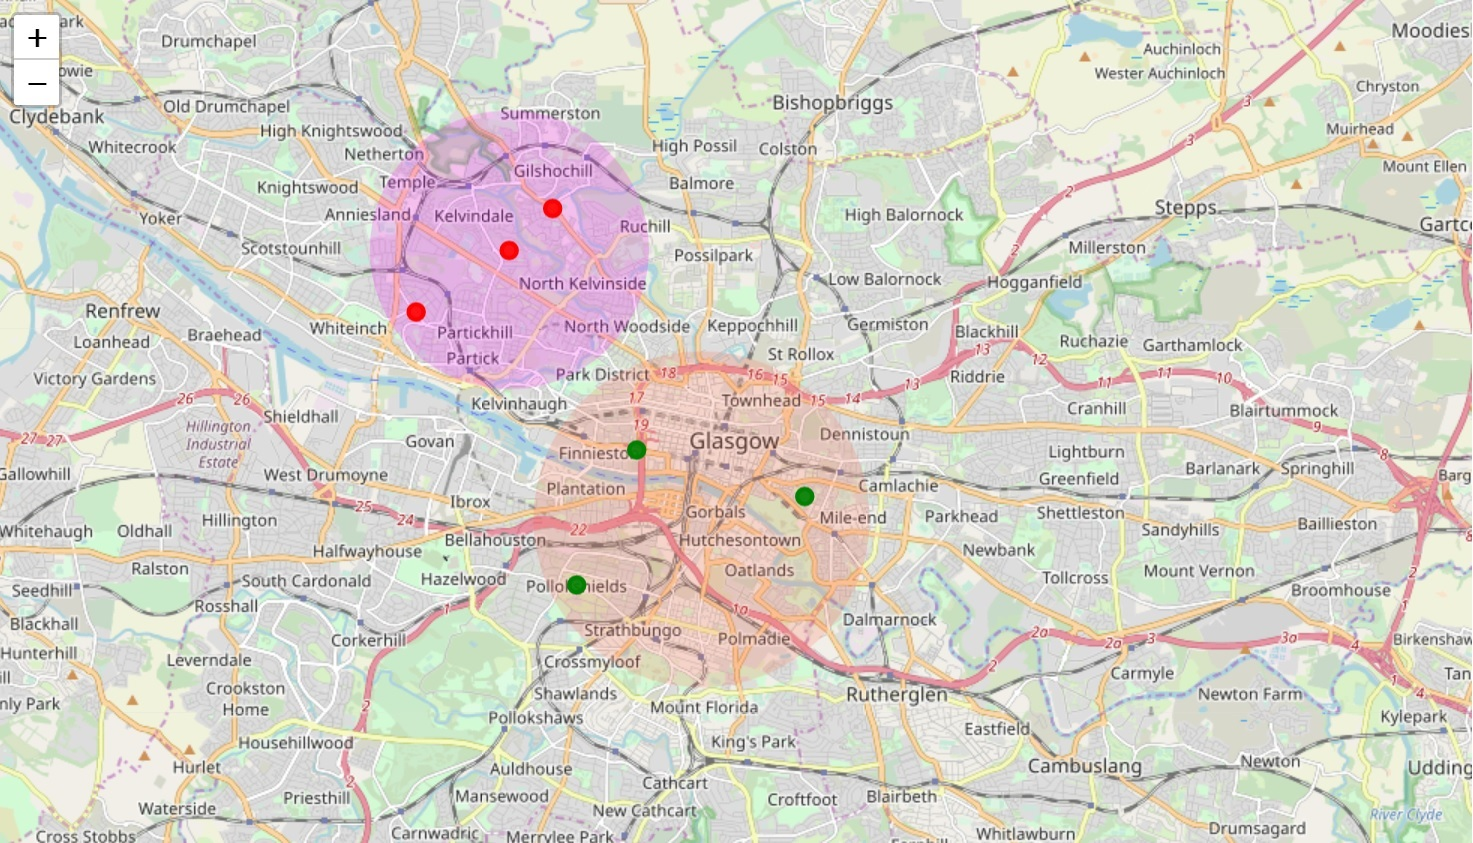

In [127]:
from IPython.display import Image
Image("Images/Glasgow_12.jpg")

The postal codes shown in green are selected for further analysis and they belong to the same sub-group. 

**Summary of final selection of Post codes**  
-  G41    
-  G3    
-  G4

These post codes meet the four criteria identified at the begining of the search. 

1. They are within 5 km of the City Center
2. They are within 2 km of the subway are easily accessable address.
3. They have high population
4. They have a diverse population

The postal codes were narrowed down from an initial list of 56 options to 3. This concludes the first stage of the project. Further analysis of these postal codes is performed using the FoursquaresAPI. 

----

# Stage 2
---

The area of search around the three postcode centers are defined in such a way as to not have any overlapping area. This is done so as to avoid duplication of results from the FoursquareAPI.  



In [148]:
# create map centered around Glasgow
map_Glasgow_Subway_5k_Top3 = folium.Map(location=[55.8507965,-4.2564398], zoom_start=12.5)

folium.Circle(
    location=[55.8507965,-4.2564398],
    radius=2400,
    color='tomato',
    fill=True,
    stroke= False,
    fill_color='tomato',
    fill_opacity=0.2
).add_to(map_Glasgow_Subway_5k_Top6)

count=0
radiusdef=[1000, 1400, 1000]

for lat, lng, post in zip(Subset1['Latitude'], Subset1['Longitude'], Subset1['Post Code']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
    location=[lat,lng],
    radius=radiusdef[count],
    color='yellow',
    fill=True,
    stroke= False,
    fill_color='mediumvioletred',
    fill_opacity=0.25
    ).add_to(map_Glasgow_Subway_5k_Top3)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.9,
        parse_html=False).add_to(map_Glasgow_Subway_5k_Top3)
    count=count+1

map_Glasgow_Subway_5k_Top3